#### **Librerías 📚**

In [30]:
import os

import missingno as msno
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler

import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### **Cargar y crear csv de muestreo 📂**

In [31]:
songs = pd.read_csv("../data/charts.csv", nrows=90000)

In [32]:
# Crea una muestra aleatoria de 90000 filas (ajusta el número si quieres más o menos)
sample_df = songs.sample(n=90000, random_state=42)

# Guarda la muestra en un nuevo archivo
sample_df.to_csv('../data/short_songs.csv', index=False)

#### **Análisis, limpieza y transformaciones 🔍**

In [33]:
songs.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [34]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    90000 non-null  object 
 1   rank     90000 non-null  int64  
 2   date     90000 non-null  object 
 3   artist   90000 non-null  object 
 4   url      90000 non-null  object 
 5   region   90000 non-null  object 
 6   chart    90000 non-null  object 
 7   trend    90000 non-null  object 
 8   streams  80838 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 6.2+ MB


In [35]:
# Convertir la columna 'date' a formato datetime
songs['date'] = pd.to_datetime(songs['date'])

In [36]:
songs.describe()

,rank,date,streams
count,90000.000000,90000,8.083800e+04
mean,87.134456,2017-07-13 06:25:17.760000256,4.771646e+04
min,1.000000,2017-01-01 00:00:00,1.001000e+03
25%,35.000000,2017-01-03 00:00:00,3.192000e+03
50%,80.000000,2017-02-02 00:00:00,8.884500e+03
75%,137.000000,2018-03-01 00:00:00,2.827475e+04
max,200.000000,2021-10-12 00:00:00,7.881255e+06
std,58.610922,NaN,1.873903e+05


<small>El análisis de la función "describe()" proporciona una visión general del comportamiento de las variables numéricas en el conjunto de datos.

📈 1. Desigualdad en las reproducciones
El streams.max es 7.8 millones, mientras que el 75% de los datos tiene menos de 28 mil streams.

Esto indica una distribución muy sesgada (long tail), típico en plataformas musicales donde unos pocos hits concentran la mayoría de las escuchas.

📉 2. Relación rank vs. streams
El rango medio de popularidad es de 87, y la mediana está en 80 → muchos temas están en el top 100, pero no necesariamente entre los primeros puestos.</small>

In [37]:
# Separar las columnas numericas y no numericas
numeric_columns = list(songs.select_dtypes(include=['number']).columns)
print('NUMERIC COLUMNS:', numeric_columns)

categorical_columns = list(songs.select_dtypes(include=['object']).columns)
print('CATEGORIC COLUMNS:', categorical_columns)

NUMERIC COLUMNS: ['rank', 'streams']
CATEGORIC COLUMNS: ['title', 'artist', 'url', 'region', 'chart', 'trend']


**Missing Values**

<Axes: >

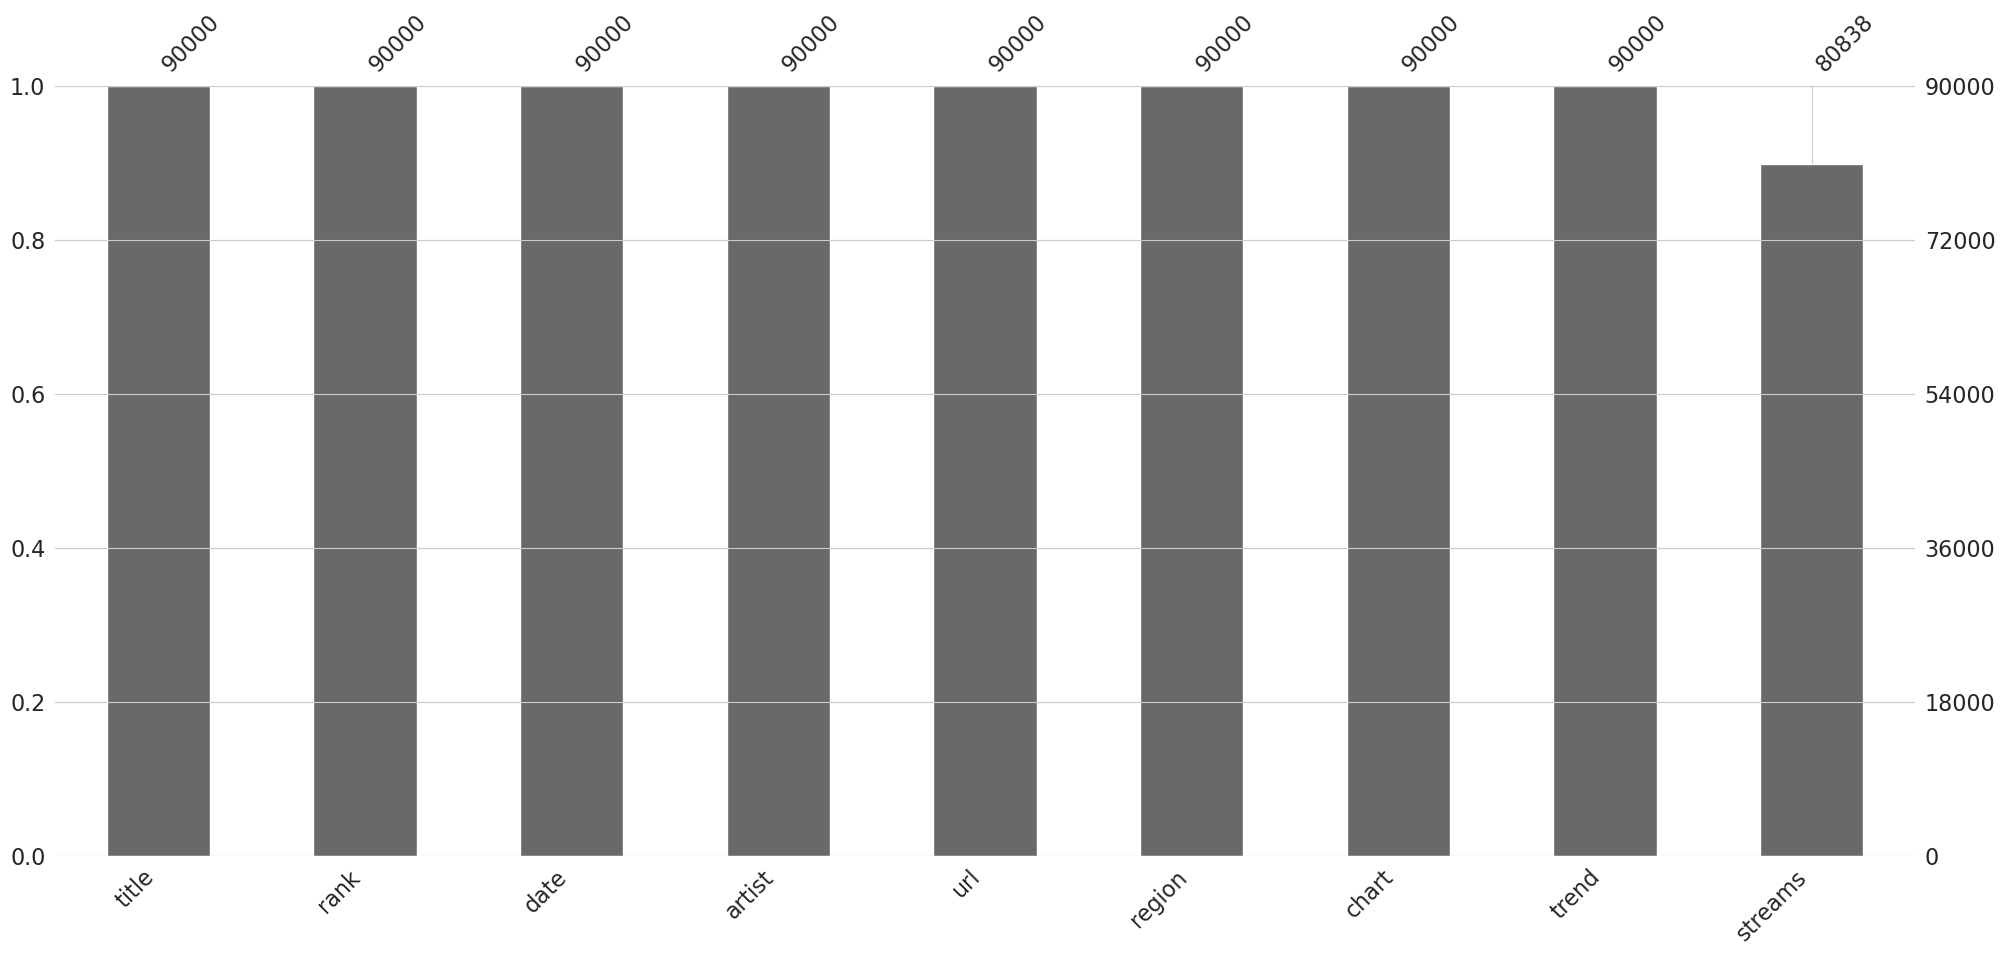

In [38]:
# Ver gráficamente los nulos
msno.bar(songs)

In [39]:
# Reemplazar los valores NaN en la columna 'streams' con 0
songs['streams'] = songs['streams'].fillna(0)

**Asímetría de los datos o data skewness ⬅️➡️**

<small>La asimetría, o "skewness", es una medida estadística que describe la simetría de la distribución de una variable.
- Asimetría Positiva (Skewness > 0): La cola derecha es más larga, indicando que la mayoría de los datos están a la izquierda, con algunos valores extremos a la derecha.
    - Transformación logarítmica
    - Transformación raíz cuadrada o cúbica.

- Asimetría Negativa (Skewness < 0): La cola izquierda es más larga, lo que significa que la mayoría de los datos están a la derecha, con algunos valores extremos a la izquierda.
    - Potencia positiva
    - Inversa logrítmica
    
- Asimetría Cero (Skewness ≈ 0): La distribución es simétrica, con colas equilibradas a ambos lados de la media.</small>

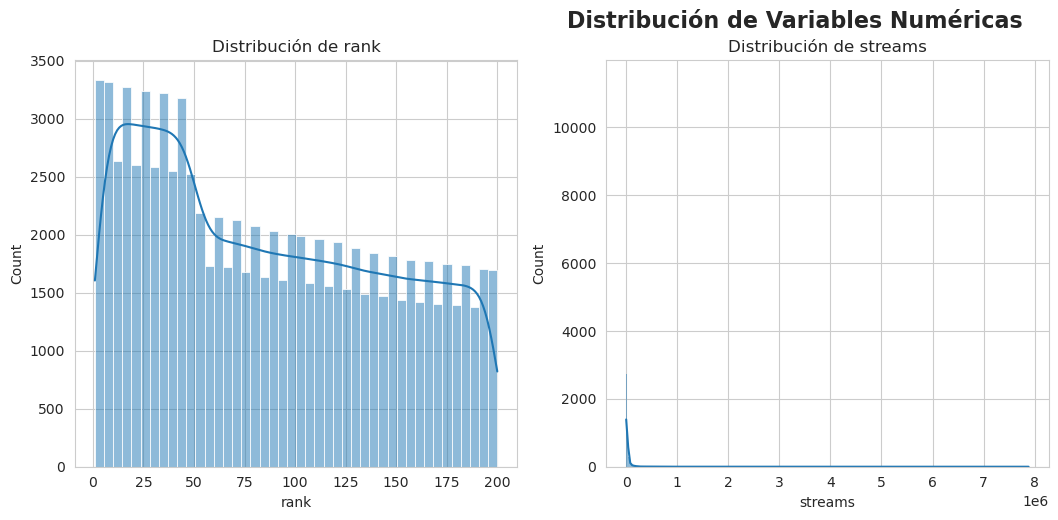

In [40]:
# Configuración para el layout del gráfico
plot_columns = 3
number_of_columns = math.ceil(len(numeric_columns) / plot_columns)
number_of_rows = math.ceil(len(numeric_columns) / plot_columns)

plt.figure(figsize=(16, 5 * number_of_rows))

for i in range(len(numeric_columns)):
    plt.subplot(number_of_rows, plot_columns, i + 1)
    sns.histplot(songs[numeric_columns[i]], kde=True)
    plt.title(f'Distribución de {numeric_columns[i]}', fontsize=12)

plt.tight_layout()
plt.suptitle('Distribución de Variables Numéricas', fontsize=16, fontweight='bold', y=1.03)
plt.show()

In [41]:
min_value = songs['streams'].min() 

# Si hay valores negativos, desplaza todos los valores para que sean positivos
if min_value < 0:
    songs['streams'] = songs['streams'] - min_value + 1  # Desplaza para que el mínimo sea 1

songs['streams'] = np.log(songs['streams'])

/home/bigdata/miniconda3/envs/env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



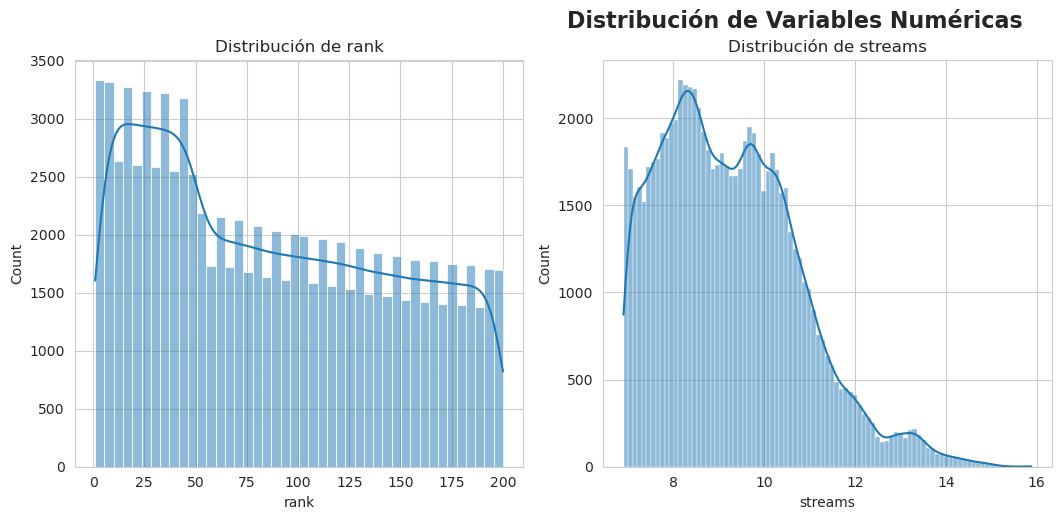

In [42]:
# Calcular cuántas filas y columnas se necesitan para disponer los gráficos de manera ordenada
plot_columns = 3
number_of_columns = math.ceil(len(numeric_columns) / plot_columns)
number_of_rows = math.ceil(len(numeric_columns) / plot_columns)

plt.figure(figsize=(16, 5 * number_of_rows))

for i in range(len(numeric_columns)):
    plt.subplot(number_of_rows, plot_columns, i + 1)
    sns.histplot(songs[numeric_columns[i]], kde=True)
    plt.title(f'Distribución de {numeric_columns[i]}', fontsize=12)

plt.tight_layout()
plt.suptitle('Distribución de Variables Numéricas', fontsize=16, fontweight='bold', y=1.03)
plt.show()

 **Manejo de los Datos Atípicos o Outliers✏️**

/tmp/ipykernel_257776/2105160934.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_257776/2105160934.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




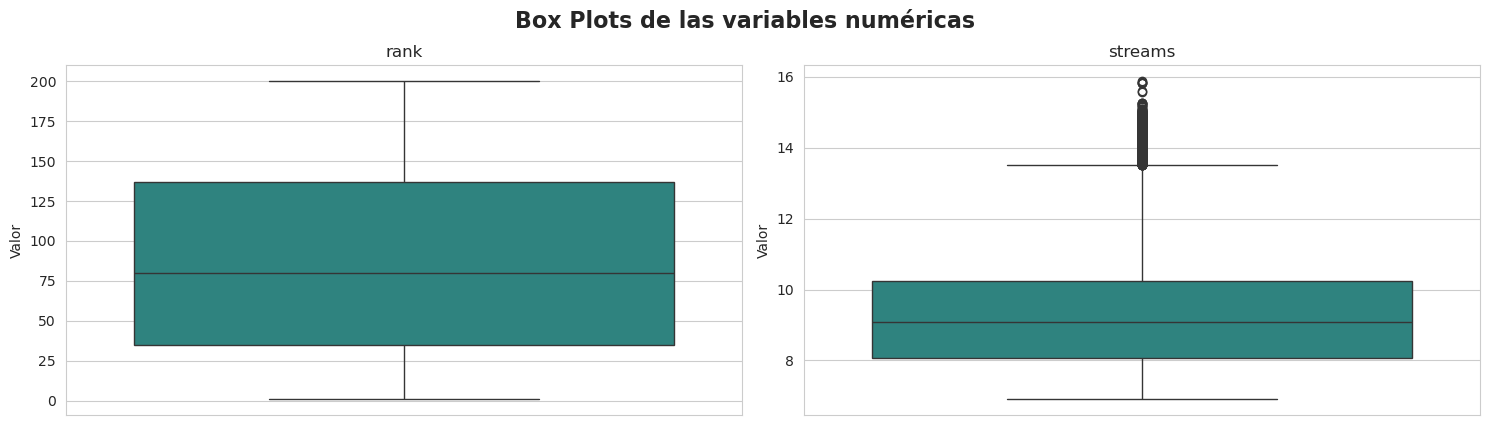

In [43]:
# Calcular cuántas filas y columnas se necesitan para disponer los gráficos de manera ordenada
plot_columns = 3
number_of_columns = math.ceil(len(numeric_columns) / plot_columns)
number_of_rows = min(len(numeric_columns), plot_columns)

plt.figure(figsize=(15, 4 * number_of_columns))

# Crear boxplots
for i in range(len(numeric_columns)):
    plt.subplot(number_of_columns, number_of_rows, i + 1)
    sns.set_style(style='whitegrid')
    sns.boxplot(data=songs[numeric_columns[i]], palette='viridis', orient='v')
    plt.title(numeric_columns[i])
    plt.xlabel('')
    plt.ylabel('Valor')

plt.tight_layout()
plt.suptitle('Box Plots de las variables numéricas', fontsize=16, fontweight='bold', y=1.05)
plt.show()

<small>La gráfica presenta boxplots para varias variables numéricas: rank y streams. Cada boxplot ilustra la distribución de los datos de cada variable, permitiendo observar la mediana, los cuartiles y los posibles outliers.

Streams: hay varios outliers lo que indica que hay canciones con un número de visitas considerablemente más altas.
</small>

In [44]:
outlier_cols = ['streams']
for col in outlier_cols:
    quartile_1, quartile_3 = np.percentile(songs[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    songs[col] = np.where(songs[col] > upper_bound, upper_bound, songs[col])
    songs[col] = np.where(songs[col] < lower_bound, lower_bound, songs[col])

### **EDA**

**Distribución de Streams por Canción**

/tmp/ipykernel_257776/1808420379.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




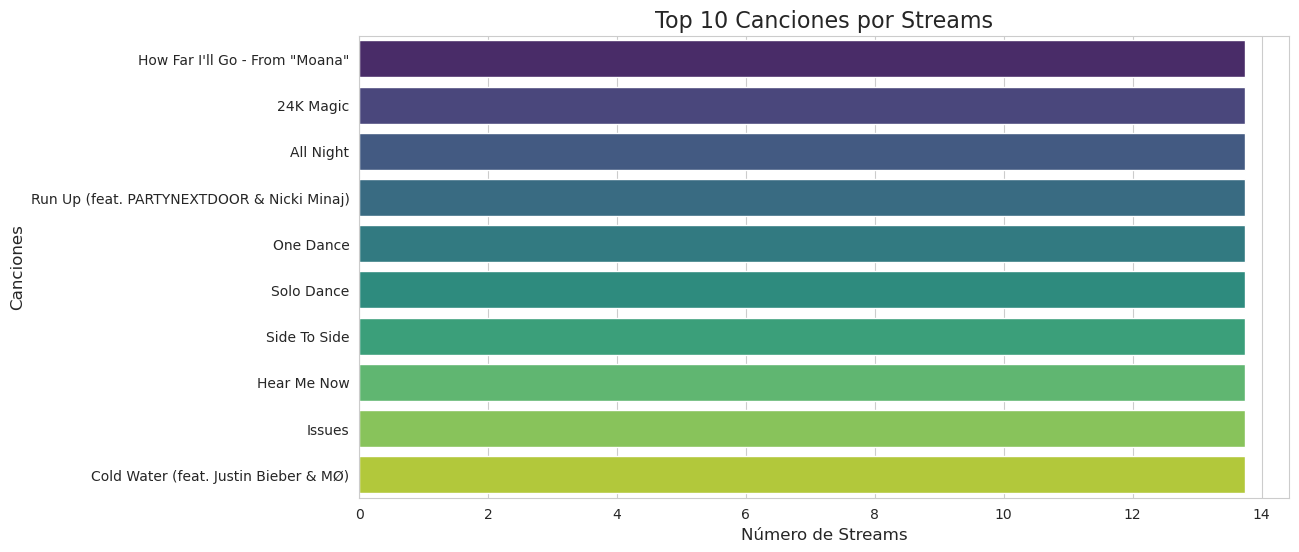

In [45]:
# Ordenamos las canciones por streams y seleccionamos las top 10
top_songs = songs[['title', 'streams']].sort_values(by='streams', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='streams', y='title', data=top_songs, palette='viridis')
plt.title('Top 10 Canciones por Streams', fontsize=16)
plt.xlabel('Número de Streams', fontsize=12)
plt.ylabel('Canciones', fontsize=12)
plt.show()


**Streams Promedio por Artista**

/tmp/ipykernel_257776/2350776475.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




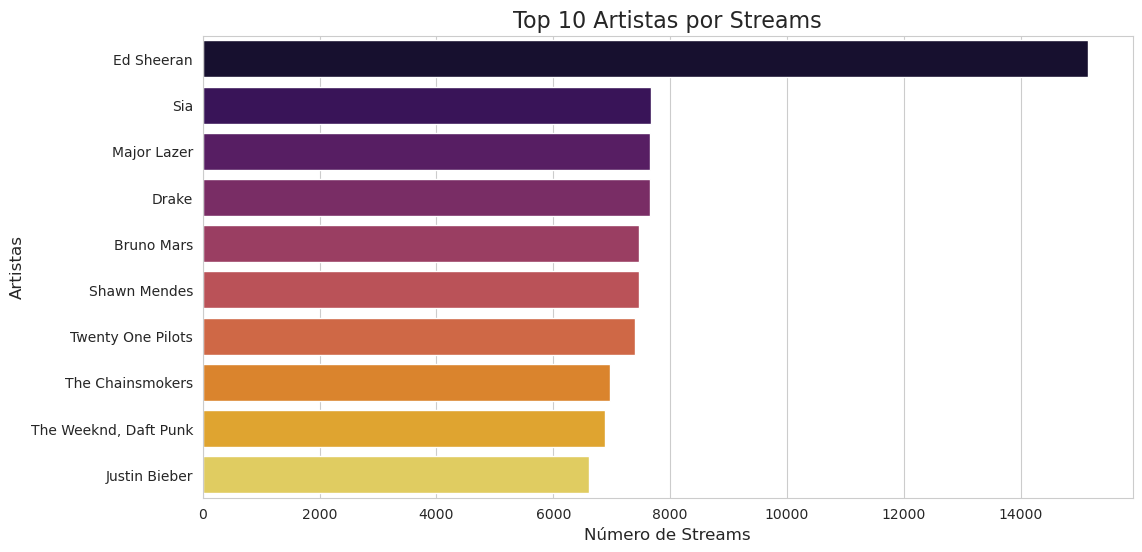

In [46]:
# Agrupamos por artista y calculamos la suma de streams
streams_by_artist = songs.groupby('artist')['streams'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=streams_by_artist.values, y=streams_by_artist.index, palette='inferno')
plt.title('Top 10 Artistas por Streams', fontsize=16)
plt.xlabel('Número de Streams', fontsize=12)
plt.ylabel('Artistas', fontsize=12)
plt.show()


**Mapa de Calor de Streams por Región**

In [49]:
# Agrupar por región y calcular la suma de streams
streams_by_region = songs.groupby('region')['streams'].sum().reset_index()

# Crear el mapa de calor usando Plotly
fig = px.choropleth(
    streams_by_region,
    locations='region',
    locationmode='country names',  # Usamos nombres de países
    color='streams',
    hover_name='region',
    color_continuous_scale="YlGnBu",  # Escala de color (puedes cambiarla)
    title="Mapa de Calor de Streams por Región"
)

# Mostrar el gráfico
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed